In [5]:
# !pip install xgboost

In [8]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,...,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,...,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [10]:
data.isna().sum().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 105 entries, Date to FinancedAmount
dtypes: float64(25), int64(79), object(1)
memory usage: 850.8+ KB


In [12]:
feature = "WrittenSales"
# print(data[feature])

In [13]:
data[feature] = pd.to_numeric(data[feature], errors='coerce') 
# print(data.info())
data[feature] 

0        267388.65
1        668799.75
2        671177.75
3        265077.82
4        161678.91
           ...    
1032    1976177.99
1033    1211572.83
1034    1057772.56
1035    1353736.67
1036     778688.29
Name: WrittenSales, Length: 1037, dtype: float64

In [14]:
data[feature]  = pd.to_numeric(data[feature] , errors='coerce') 
type(data[feature] [0]) 

numpy.float64

In [15]:
data["WrittenSales"].min(), data["WrittenSales"].max()

(-335377.80999999994, 3527566.7700000005)

In [16]:
bins = [-500000,250000,350000,500000,650000,900000, 3600000]
names = [1,2,3,4,5,6]

In [17]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


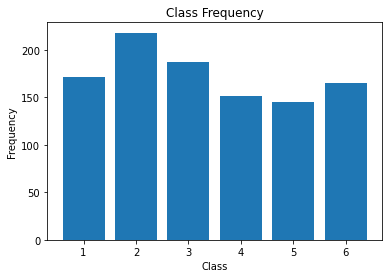

In [18]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [19]:
# data = data[data["Range"] <= 7]
# data

In [20]:
data.Range.isna().sum()

0

In [21]:
data.dropna(inplace =True)

In [22]:
data[["WrittenSales", "Range"]]

,WrittenSales,Range
0,267388.65,2
1,668799.75,5
2,671177.75,5
3,265077.82,2
4,161678.91,1
...,...,...
1032,1976177.99,6
1033,1211572.83,6
1034,1057772.56,6
1035,1353736.67,6


In [23]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

In [24]:
print(data["Range"].unique())

[2, 5, 1, 3, 6, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]


In [25]:
data[feature].max(),data["Range"].max()

(3527566.7700000005, 6)

# Train - Test Split

In [26]:
y = data.Range.astype(int).values

X = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1).values

X_df = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)

In [27]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# define the dataset - SYNTHETIC DATA
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 34.11


C:\Users\DKici\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 34.11
Feature Importances :  [0.01223726 0.01174054 0.01308597 0.         0.04321845 0.
 0.01972282 0.02453283 0.01188102 0.01939041 0.         0.
 0.         0.         0.00659426 0.00564567 0.         0.
 0.         0.         0.04660029 0.01365032 0.00778129 0.
 0.         0.         0.01099848 0.         0.         0.
 0.         0.         0.         0.01008014 0.         0.
 0.01973943 0.01962135 0.02246836 0.00757465 0.01261613 0.
 0.04665149 0.01045912 0.00642283 0.00999072 0.         0.
 0.01639784 0.0105012  0.         0.         0.         0.00080104
 0.01319109 0.         0.0065104  0.01789978 0.01461829 0.01680053
 0.         0.00413829 0.         0.00218663

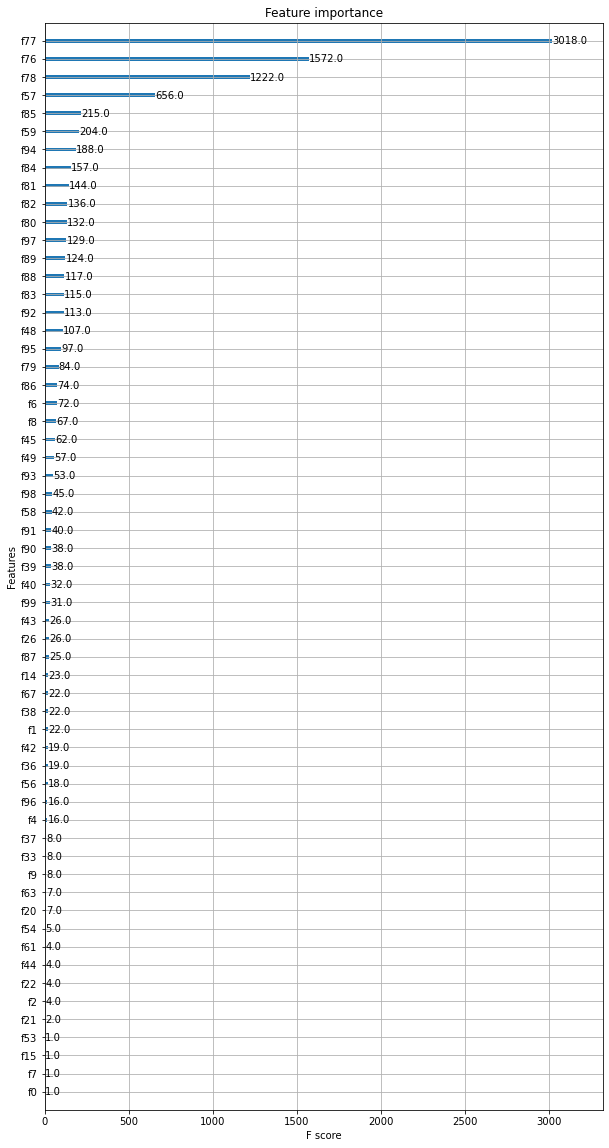

In [32]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
ax = plot_importance(xgb_model)
fig = ax.figure
fig.set_size_inches(10, 20)
plt.show()



In [46]:
feat = data.drop(["Date","Traffic","Margin", "WrittenSales","FinancedAmount","Range"],axis=1)
feat.columns[77]

'day'